In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import os, sys
sys.path.append('/home/hrai/codes/hpe_library')
from hpe_library.lib_import import *
from hpe_library. my_utils import *

from sympy import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Tutorial

In [8]:
init_printing()

In [22]:
Rational(1,2), pi, N(pi), pi.evalf(), I, 2*I, Symbol('t')

In [24]:
x, y, z = symbols('x, y, z')

In [29]:
expr = x**2 +1
expr, expr.subs(x, 2), expr.subs(x, y)

In [30]:
_

In [31]:
simplify( cos(x)**2 + sin(x)**2 )

### Mathematical anaylsis

In [82]:
world_3d, cam_3d, img_2d, img_3d = symbols('P_W, P_C, P_p, P_{p^{3d}}')
world_3d_canonical, cam_3d_canonical, img_2d_canonical, img_3d_canonical = symbols('P_{Wcanon}, P_{Ccanon}, P_{p\;canon}, P_{p^{3d}canon}')
world_3d, cam_3d, img_2d, img_3d, world_3d_canonical, cam_3d_canonical, img_2d_canonical, img_3d_canonical

In [89]:
X_W_i, Y_W_i, Z_W_i = symbols('X_W^i, Y_W^i, Z_W^i')
X_C_i, Y_C_i, Z_C_i = symbols('X_C^i, Y_C^i, Z_C^i')
X_W_i, Y_W_i, Z_W_i, X_C_i, Y_C_i, Z_C_i

In [90]:
X_W_pelvis, Y_W_pelvis, Z_W_pelvis = symbols('X_W^{pelvis}, Y_W^{pelvis}, Z_W^{pelvis}')
X_C_pelvis, Y_C_pelvis, Z_C_pelvis = symbols('X_C^{pelvis}, Y_C^{pelvis}, Z_C^{pelvis}')
X_W_pelvis, Y_W_pelvis, Z_W_pelvis, X_C_pelvis, Y_C_pelvis, Z_C_pelvis

In [91]:
X_W_i_canon, Y_W_i_canon, Z_W_i_canon = symbols('X_{Wcanon}^i, Y_{Wcanon}^i, Z_{Wcanon}^i')
X_C_i_canon, Y_C_i_canon, Z_C_i_canon = symbols('X_{Ccanon}^i, Y_{Ccanon}^i, Z_{Ccanon}^i')
X_W_i_canon, Y_W_i_canon, Z_W_i_canon, X_C_i_canon, Y_C_i_canon, Z_C_i_canon

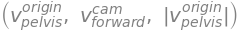

In [93]:
v_origin_to_pelvis, v_cam_forward = symbols('v^{origin}_{pelvis}, v^{cam}_{forward}')
mag_v_origin_to_pelvis = symbols('|v^{origin}_{pelvis}|')
v_origin_to_pelvis, v_cam_forward, mag_v_origin_to_pelvis

In [120]:
u_i, v_i, s_i, u_i_canon, v_i_canon, s_i_canon = symbols('u^i, v^i, s^i, u^i_{canon}, v^i_{canon}, s^i_{canon}')
u_i, v_i, s_i, u_i_canon, v_i_canon, s_i_canon

In [104]:
r11, r12, r13, r21, r22, r23, r31, r32, r33 = symbols('r11, r12, r13, r21, r22, r23, r31, r32, r33')
c1, c2, c3 = symbols('c1, c2, c3')
t1, t2, t3 = symbols('t1, t2, t3')
fx, fy, cx, cy = symbols('f_x, f_y, c_x, c_y')
r11, r12, r13, r21, r22, r23, r31, r32, r33, c1, c2, c3, t1, t2, t3, fx, fy, cx, cy

In [101]:
exp_dict = {}

In [103]:
exp_dict['X_C_i'] = r11*X_W_i + r12*Y_W_i + r13*Z_W_i + t1
exp_dict['Y_C_i'] = r21*X_W_i + r22*Y_W_i + r23*Z_W_i + t2
exp_dict['Z_C_i'] = r31*X_W_i + r32*Y_W_i + r33*Z_W_i + t3
exp_dict['X_C_i'], exp_dict['Y_C_i'], exp_dict['Z_C_i']

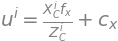

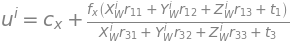

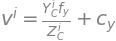

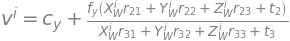

In [145]:
exp_dict['u_i'] = fx * X_C_i / Z_C_i + cx 
exp_dict['v_i'] = fy * Y_C_i / Z_C_i + cy 
exp_dict['s_i'] = Z_C_i

display(Eq(u_i, exp_dict['u_i']), Eq(u_i, exp_dict['u_i'].subs([(X_C_i, exp_dict['X_C_i']), (Z_C_i, exp_dict['Z_C_i'])])))
display(Eq(v_i, exp_dict['v_i']), Eq(v_i, exp_dict['v_i'].subs([(Y_C_i, exp_dict['Y_C_i']), (Z_C_i, exp_dict['Z_C_i'])])))
display(Eq(s_i, exp_dict['s_i']), Eq(s_i, exp_dict['s_i'].subs(Z_C_i, exp_dict['Z_C_i'])))

In [122]:
exp_dict['X_W_i_canon'] = X_W_i - X_W_pelvis + c1 + mag_v_origin_to_pelvis * r13
exp_dict['Y_W_i_canon'] = Y_W_i - Y_W_pelvis + c2 + mag_v_origin_to_pelvis * r23
exp_dict['Z_W_i_canon'] = Z_W_i - Z_W_pelvis + c3 + mag_v_origin_to_pelvis * r33
display(X_W_i_canon, exp_dict['X_W_i_canon'])
display(Y_W_i_canon, exp_dict['Y_W_i_canon'])
display(Z_W_i_canon, exp_dict['Z_W_i_canon'])

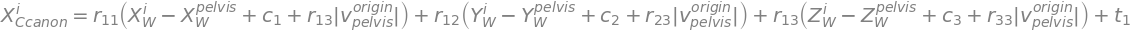

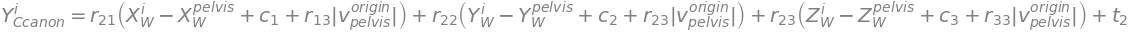

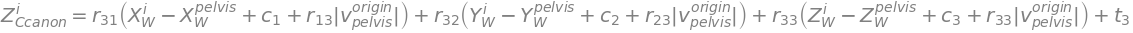

In [146]:
exp_dict['X_C_i_canon'] = r11*X_W_i_canon + r12*Y_W_i_canon + r13*Z_W_i_canon + t1  # r11*exp_dict['X_W_i_canon'] + r12*exp_dict['Y_W_i_canon'] + r13*exp_dict['Z_W_i_canon'] + t1
exp_dict['Y_C_i_canon'] = r21*X_W_i_canon + r22*Y_W_i_canon + r23*Z_W_i_canon + t2  # r21*exp_dict['X_W_i_canon'] + r22*exp_dict['Y_W_i_canon'] + r23*exp_dict['Z_W_i_canon'] + t2
exp_dict['Z_C_i_canon'] = r31*X_W_i_canon + r32*Y_W_i_canon + r33*Z_W_i_canon + t3  # r31*exp_dict['X_W_i_canon'] + r32*exp_dict['Y_W_i_canon'] + r33*exp_dict['Z_W_i_canon'] + t3
display(Eq(X_C_i_canon, exp_dict['X_C_i_canon']), Eq(X_C_i_canon, exp_dict['X_C_i_canon'].subs([(X_W_i_canon, exp_dict['X_W_i_canon']), (Y_W_i_canon, exp_dict['Y_W_i_canon']), (Z_W_i_canon, exp_dict['Z_W_i_canon'])])))
display(Eq(Y_C_i_canon, exp_dict['Y_C_i_canon']), Eq(Y_C_i_canon, exp_dict['Y_C_i_canon'].subs([(X_W_i_canon, exp_dict['X_W_i_canon']), (Y_W_i_canon, exp_dict['Y_W_i_canon']), (Z_W_i_canon, exp_dict['Z_W_i_canon'])])))
display(Eq(Z_C_i_canon, exp_dict['Z_C_i_canon']), Eq(Z_C_i_canon, exp_dict['Z_C_i_canon'].subs([(X_W_i_canon, exp_dict['X_W_i_canon']), (Y_W_i_canon, exp_dict['Y_W_i_canon']), (Z_W_i_canon, exp_dict['Z_W_i_canon'])])))

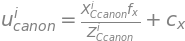

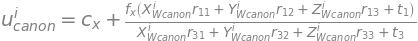

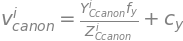

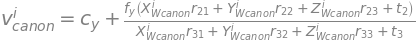

In [149]:
exp_dict['u_i_canon'] = fx * X_C_i_canon / Z_C_i_canon + cx # fx * exp_dict['X_C_i_canon'] / exp_dict['Z_C_i_canon'] + cx
exp_dict['v_i_canon'] = fy * Y_C_i_canon / Z_C_i_canon + cy # fy * exp_dict['Y_C_i_canon'] / exp_dict['Z_C_i_canon'] + cy
exp_dict['s_i_canon'] = Z_C_i_canon
display(Eq(u_i_canon, exp_dict['u_i_canon']), Eq(u_i_canon, exp_dict['u_i_canon'].subs([(X_C_i_canon, exp_dict['X_C_i_canon']), (Z_C_i_canon, exp_dict['Z_C_i_canon'])])))
display(Eq(v_i_canon, exp_dict['v_i_canon']), Eq(v_i_canon, exp_dict['v_i_canon'].subs([(Y_C_i_canon, exp_dict['Y_C_i_canon']), (Z_C_i_canon, exp_dict['Z_C_i_canon'])])))
display(Eq(s_i_canon, exp_dict['s_i_canon']), Eq(s_i_canon, exp_dict['s_i_canon'].subs(Z_C_i_canon, exp_dict['Z_C_i_canon'])))

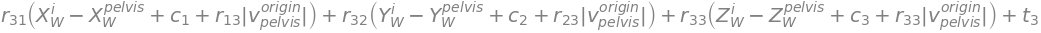

In [155]:
exp_dict['Z_C_i_canon'].subs([(X_W_i_canon, exp_dict['X_W_i_canon']), (Y_W_i_canon, exp_dict['Y_W_i_canon']), (Z_W_i_canon, exp_dict['Z_W_i_canon'])])

In [152]:
exp_dict['Z_C_i']